<a href="https://colab.research.google.com/github/haragar/Data-Science-and-Analysis-project/blob/main/Copy_of_Face_Mask_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:04<00:00, 43.2MB/s]
100% 163M/163M [00:04<00:00, 36.6MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_102.jpg', 'with_mask_2373.jpg', 'with_mask_2902.jpg', 'with_mask_1099.jpg', 'with_mask_2811.jpg']
['with_mask_852.jpg', 'with_mask_3006.jpg', 'with_mask_3075.jpg', 'with_mask_1536.jpg', 'with_mask_143.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3087.jpg', 'without_mask_3195.jpg', 'without_mask_3625.jpg', 'without_mask_3254.jpg', 'without_mask_1828.jpg']
['without_mask_1445.jpg', 'without_mask_2889.jpg', 'without_mask_2014.jpg', 'without_mask_3136.jpg', 'without_mask_397.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


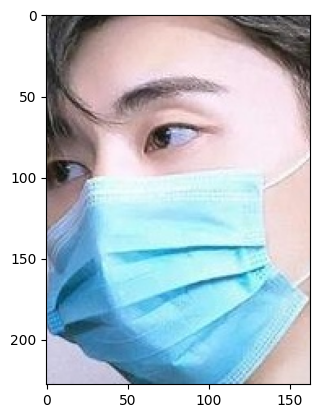

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

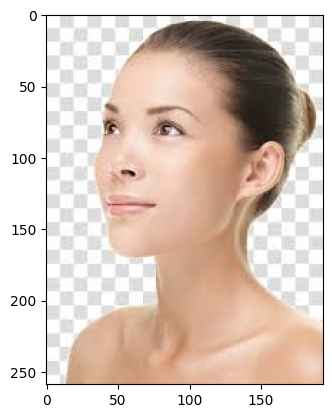

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 22,  17,  23],
        [ 18,  13,  19],
        [ 19,  14,  21],
        ...,
        [104,  30, 127],
        [155,  45, 187],
        [161,  23, 207]],

       [[ 18,  14,  19],
        [ 17,  12,  18],
        [ 18,  13,  20],
        ...,
        [ 80,  26,  90],
        [122,  35, 141],
        [154,  40, 190]],

       [[ 16,  14,  19],
        [ 11,   8,  14],
        [ 17,  12,  19],
        ...,
        [ 60,  22,  59],
        [ 83,  21,  88],
        [124,  42, 144]],

       ...,

       [[164, 100, 254],
        [166, 107, 252],
        [163, 112, 248],
        ...,
        [ 97,  52,  61],
        [ 83,  40,  50],
        [ 69,  29,  40]],

       [[162, 110, 253],
        [155, 107, 247],
        [140,  98, 231],
        ...,
        [ 95,  51,  60],
        [ 80,  38,  48],
        [ 68,  28,  39]],

       [[135,  92, 222],
        [124,  86, 207],
        [130,  98, 200],
        ...,
        [ 93,  50,  58],
        [ 79,  37,  47],
        [ 70,  29,  40]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[109,  82,  65],
        [ 88,  61,  44],
        [ 54,  27,   9],
        ...,
        [163, 126, 108],
        [168, 131, 113],
        [171, 134, 116]],

       [[ 63,  36,  18],
        [ 52,  25,  12],
        [ 38,  11,   1],
        ...,
        [165, 128, 110],
        [170, 133, 115],
        [171, 134, 116]],

       [[ 42,  15,   0],
        [ 42,  16,   3],
        [ 45,  19,   9],
        ...,
        [167, 130, 112],
        [169, 132, 114],
        [169, 132, 114]],

       ...,

       [[ 40,  19,  16],
        [ 38,  18,  14],
        [ 35,  16,  12],
        ...,
        [ 58,  29,  28],
        [ 71,  41,  41],
        [ 79,  49,  49]],

       [[ 37,  16,  13],
        [ 35,  15,  12],
        [ 32,  13,   9],
        ...,
        [ 60,  32,  30],
        [ 70,  40,  39],
        [ 75,  45,  44]],

       [[ 34,  13,  10],
        [ 32,  12,   9],
        [ 29,  10,   6],
        ...,
        [ 59,  31,  28],
        [ 67,  38,  35],
        [ 71,  41,  39]]

In [ ]:
X_train_scaled[0]

array([[[0.42745098, 0.32156863, 0.25490196],
        [0.34509804, 0.23921569, 0.17254902],
        [0.21176471, 0.10588235, 0.03529412],
        ...,
        [0.63921569, 0.49411765, 0.42352941],
        [0.65882353, 0.51372549, 0.44313725],
        [0.67058824, 0.5254902 , 0.45490196]],

       [[0.24705882, 0.14117647, 0.07058824],
        [0.20392157, 0.09803922, 0.04705882],
        [0.14901961, 0.04313725, 0.00392157],
        ...,
        [0.64705882, 0.50196078, 0.43137255],
        [0.66666667, 0.52156863, 0.45098039],
        [0.67058824, 0.5254902 , 0.45490196]],

       [[0.16470588, 0.05882353, 0.        ],
        [0.16470588, 0.0627451 , 0.01176471],
        [0.17647059, 0.0745098 , 0.03529412],
        ...,
        [0.65490196, 0.50980392, 0.43921569],
        [0.6627451 , 0.51764706, 0.44705882],
        [0.6627451 , 0.51764706, 0.44705882]],

       ...,

       [[0.15686275, 0.0745098 , 0.0627451 ],
        [0.14901961, 0.07058824, 0.05490196],
        [0.1372549 , 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4674 - acc: 0.7859 - val_loss: 0.2694 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2976 - acc: 0.8819 - val_loss: 0.2227 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2417 - acc: 0.9003 - val_loss: 0.1857 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 4s 25ms/step - loss: 0.2112 - acc: 0.9209 - val_loss: 0.1791 - val_acc: 0.9388
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1921 - acc: 0.9297 - val_loss: 0.1816 - val_acc: 0.9372


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2104 - acc: 0.9206
Test Accuracy = 0.9205824136734009


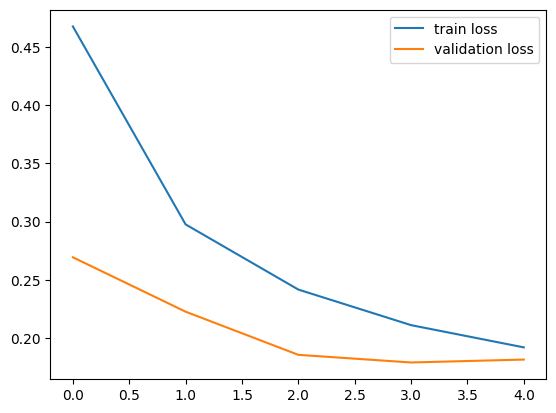

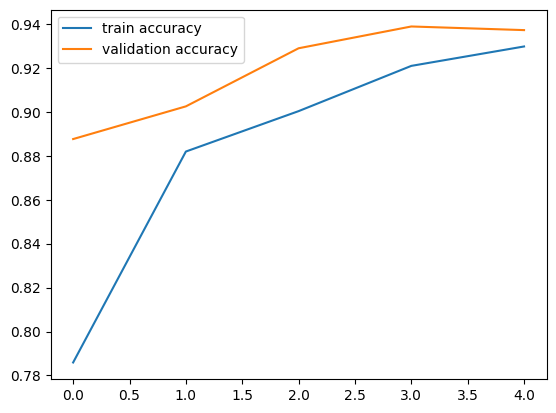

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/m2image.png


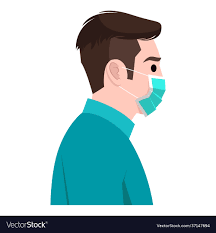

1/1 [==============================] - 0s 334ms/step
[[0.69248044 0.38648126]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/maskimage.jpg


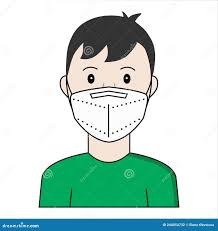

1/1 [==============================] - 0s 17ms/step
[[0.6544047  0.39646956]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')